In [ ]:
import numpy as mp
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
#loading a csv data to a pandas data-frame
gold_data = pd.read_csv('/content/seattle-weather updated.csv')

In [ ]:
#checking for missing values
gold_data.isnull().sum()


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
gold_data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [ ]:
correlation = gold_data.corr()

<Axes: >

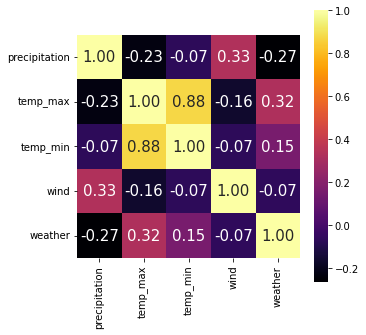

In [ ]:
#construction a heap map to understand a correlation
plt.figure(figsize = (5,5))
sns.heatmap(correlation, cbar = True, square=True, fmt='.2f', annot=True, annot_kws = {'size':15}, cmap = 'inferno')

In [ ]:
#correlation values of GLD
print(correlation['weather'])

precipitation   -0.267388
temp_max         0.322337
temp_min         0.154981
wind            -0.065858
weather          1.000000
Name: weather, dtype: float64


<ipython-input-10-c4a966cffd2a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['weather'])


<Axes: xlabel='weather', ylabel='Density'>

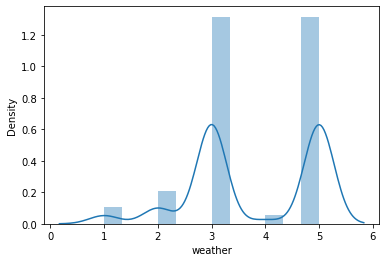

In [ ]:
#checking the distrubution of the gold price
sns.distplot(gold_data['weather'])

In [ ]:
#separating data and labels
X = gold_data.drop(columns='weather', axis=1)
X = X.drop(columns='date', axis=1)
#axis = 1 : if you are droping a column
#axis = 2 : if you are droping a row
Y = gold_data['weather']
print(Y)
print(X)

0       1
1       1
2       1
3       1
4       1
       ..
1456    5
1457    5
1458    5
1459    5
1460    5
Name: weather, Length: 1461, dtype: int64
      precipitation  temp_max  temp_min  wind
0               0.0      12.8       5.0   4.7
1               0.0       6.7      -2.2   1.4
2               0.0       7.2       0.6   1.8
3               0.0      12.8       6.1   4.3
4               0.0      15.0       3.9   4.0
...             ...       ...       ...   ...
1456            0.0       7.2      -2.7   1.0
1457            0.0       7.8       1.7   1.7
1458            0.0       4.4       0.0   2.5
1459            0.0       5.6      -1.0   3.4
1460            0.0       5.6      -2.1   3.5

[1461 rows x 4 columns]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1461, 4) (1095, 4) (366, 4)


In [ ]:
model = RandomForestRegressor(n_estimators = 200)

In [ ]:
#training the model 
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
#prediction on test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[4.665      5.         3.         4.82       3.         3.
 4.005      3.         4.715      3.         3.         4.34
 4.58125    4.095      3.         4.675      3.         3.
 3.         2.26       2.14       4.675      3.475      4.465
 4.31       4.745      5.         3.3        3.         4.92
 4.775      3.         4.825      3.         3.         4.96
 3.         3.49       4.8725     4.97       3.         3.04
 3.925      3.         3.         3.9        3.17       3.69
 3.365      4.94       3.265      4.905      4.735      3.01
 4.775      4.56166667 4.57       3.         4.95       3.6
 4.88       5.         4.67       2.505      3.9        4.45
 3.         3.355      3.505      3.         4.035      3.
 3.         3.         3.         4.985      3.         3.
 4.72       3.945      4.657      3.         4.105      4.85
 3.605      3.785      4.895      3.         3.         4.75
 4.365      3.         4.905      3.         3.         3.
 3.005      3.555      3.025      

In [ ]:
# R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.1598618640029812


In [ ]:
Y_test = list(Y_test)

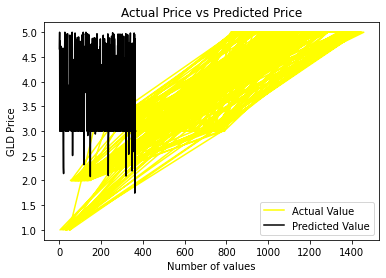

In [ ]:
plt.plot(Y_test,color='yellow',label= 'Actual Value')
plt.plot(test_data_prediction, color='black', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
import pickle

In [ ]:
filename = 'model_weather.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('model_weather.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [ ]:
for column in X.columns:
  print(column)